# Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


<h2>Data Science Problem:</h2>
This data science problem I am designing neural net on MNIST handwritten digits images to identify their correct label i.e number in image. 
Here we can use the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification. It also includes how to save the model and later load it to make predictions on new data.

In [184]:

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D,Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Data Collection/Processing: 

In [185]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the shape of training and test sets
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


<i>We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.</i>

# Data Exploration: Exploring the your data

**Plotting some properties/statistics/distribution of your data** 

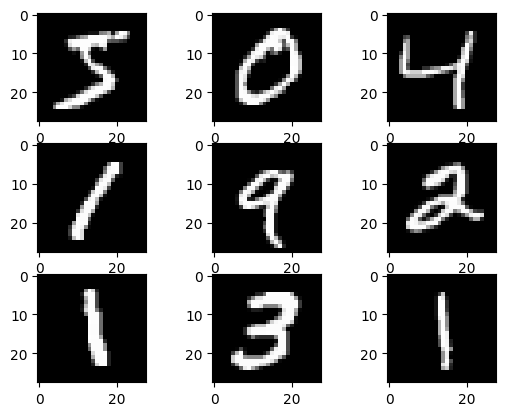

In [186]:
from matplotlib import pyplot

# plot the images from dataset
for i in range(9):

 # define the subplot
 pyplot.subplot(330 + 1 + i)

 # plot the raw pixel data
 pyplot.imshow(X_train[i], cmap='gray')


pyplot.show()

<i>Here we have plotted the first nine images in the dataset is also created showing the natural handwritten nature of the images to be classified.</i>

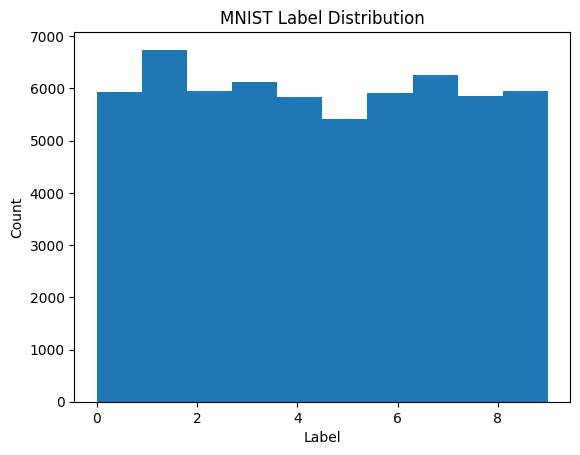

Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples


In [187]:
# Plot a histogram of the label distribution
from matplotlib import pyplot as plt


plt.hist(y_train, bins=10)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('MNIST Label Distribution')
plt.show()


for i in range(10):
    count = len(y_train[y_train == i])
    print(f'Label {i}: {count} samples')

<i>Based on the above samples, the MNIST dataset appears to be reasonably balanced. While there is some variation in the number of samples across the 10 different labels, the differences are not large enough to indicate a significant class imbalance.</i>

# Implementing a solution to the problem we are trying to solve.

In [188]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train1 = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test1 = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

<h2> 1) Baseline Model with Multi-Layer Perceptrons</h2>

We get very good results using a very simple neural network model with a single hidden layer. We will further use this as a baseline for comparing with more complex convolutional neural network models.

<i>
 
1) The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs. 

2) A rectifier activation function is used for the neurons in the hidden layer.

3) A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the ten to be -selected as the model’s output prediction.

4) The efficient ADAM gradient descent algorithm is used to learn the weights.

5) The model is fit over ten epochs with updates every 200 images.The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. 

6) A verbose value of 2 is used to reduce the output to one line for each training epoch. And lastly model is evaluated and a classification error rate is printed</i>

In [189]:
# define baseline model
def baseline_model():
 
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

# build the model
model = baseline_model()

# Fit the model
history = model.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - loss: 0.2799 - accuracy: 0.9210 - val_loss: 0.1398 - val_accuracy: 0.9599 - 3s/epoch - 8ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1095 - accuracy: 0.9685 - val_loss: 0.0957 - val_accuracy: 0.9706 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0711 - accuracy: 0.9797 - val_loss: 0.0836 - val_accuracy: 0.9754 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0508 - accuracy: 0.9858 - val_loss: 0.0801 - val_accuracy: 0.9738 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.0633 - val_accuracy: 0.9788 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0666 - val_accuracy: 0.9797 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0593 - val_accuracy: 0.9809 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0137 - accuracy: 0.9971 - val_loss: 0.0620 - val_accuracy: 0.9811 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s 

In [190]:
# Final evaluation of the model
scores_1 = model.evaluate(X_test1, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores_1[1]*100))

final_loss, final_acc = model.evaluate(X_test1, y_test, verbose=0)
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss, final_acc*100))

Baseline Error: 1.97%
Final Loss: 0.0662, Final Accuracy: 98.0300 %


<i>This very simple network defined in very few lines of code achieves a error rate of 1.71%. And pretty good accuracy of 98%</i>

Text(0.5, 1.0, 'Training History')

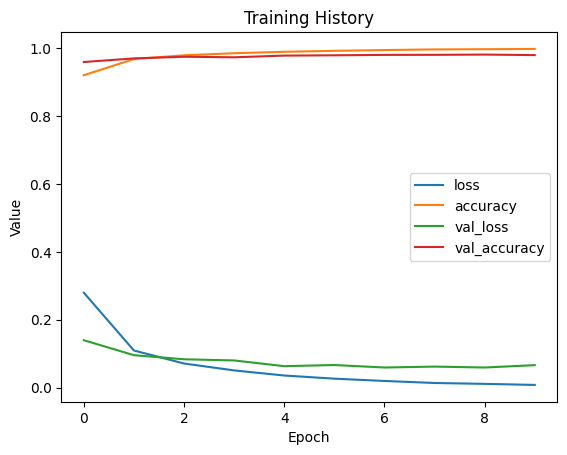

In [191]:
import pandas as pd

# Plot the training history
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')

# plt.plot(history.history['loss'], color='b')
# plt.plot(history.history['val_loss'], color='r')
# plt.show()

# plt.plot(history.history['accuracy'], color='b')
# plt.plot(history.history['val_accuracy'], color='r')
# plt.show()

<h2> 2) Simple Convolutional Neural Network</h2>

In this section, you will create a simple CNN for MNIST that demonstrates how to use all the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers, and Dropout layers.


Convolutional neural networks are more complex than standard multi-layer perceptrons, so you will start by using a simple structure that uses all the elements for state-of-the-art results. Below summarizes the network architecture.

<i>

1) The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, with the size of 5×5 and a rectifier activation function. This is the input layer that expects images with the structure outlined above: [pixels][width][height].

2) Next, define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.

3) The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

4) Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard, fully connected layers.

5) Next is a fully connected layer with 128 neurons and a rectifier activation function.

6) Finally, the output layer has ten neurons for the ten classes and a softmax activation function to output probability-like predictions for each class.</i>

In [192]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train2 = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test2 = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train2 = X_train / 255
X_test2 = X_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Here in this case we need to reshape again it to be suitable for training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height][channels].

In the case of RGB, the last dimension pixels would be 3 for the red, green, and blue components, and it would be like having three image inputs for every color image. In the case of MNIST, where the pixel values are grayscale, the pixel dimension is set to 1

In [193]:
# define a simple CNN model
def simple_cnn():
 # create model
 model2 = Sequential()
 model2.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model2.add(MaxPooling2D())
 model2.add(Dropout(0.2))
 model2.add(Flatten())
 model2.add(Dense(128, activation='relu'))
 model2.add(Dense(num_classes, activation='softmax'))

 # Compile model
 model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model2

# build the model
model2 = simple_cnn()

# Fit the model
history2 = model2.fit(X_train2, y_train, validation_data=(X_test2, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 [==============================] - 15s 39ms/step - loss: 0.2417 - accuracy: 0.9289 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 2/10
300/300 [==============================] - 12s 40ms/step - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0493 - val_accuracy: 0.9840
Epoch 3/10
300/300 [==============================] - 13s 42ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0421 - val_accuracy: 0.9861
Epoch 4/10
300/300 [==============================] - 15s 49ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.0379 - val_accuracy: 0.9865
Epoch 5/10
300/300 [==============================] - 14s 46ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 6/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0372 - val_accuracy: 0.9882
Epoch 7/10
300/300 [==============================] - 14s 45ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0334 - val_accuracy:

CNN Error: 1.07%
Final Loss: 0.0339, Final Accuracy: 98.9300 %


Text(0.5, 1.0, 'Training History')

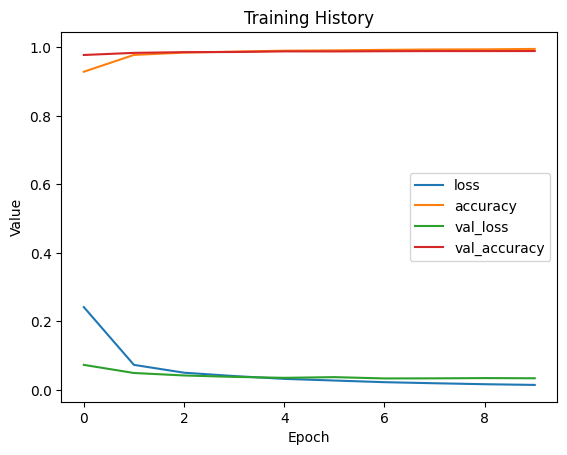

In [194]:
# Final evaluation of the model
scores_2 = model2.evaluate(X_test2, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores_2[1]*100))

final_loss_2, final_acc_2 = model2.evaluate(X_test2, y_test, verbose=0)
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss_2, final_acc_2*100))

# Plot the training history
pd.DataFrame(history2.history).plot()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')

From the above output we can observe that it gives error rate of 1.03 and a good accuracy of 98.97%. And also from the training history curves we can analyze that model is working good.


<h2> 3) Larger Convolutional Neural Network</h2>

Now we define a large CNN architecture with additional convolutional, max pooling layers, and fully connected layers. The network topology can be summarized as follows:

<i>

1) Convolutional layer with 30 feature maps of size 5×5

2) Pooling layer taking the max over 2*2 patches

3) Convolutional layer with 15 feature maps of size 3×3

4) Pooling layer taking the max over 2*2 patches

5) Dropout layer with a probability of 20%

6) Flatten layer

7) Fully connected layer with 128 neurons and rectifier activation

8) Fully connected layer with 50 neurons and rectifier activation

9) Output layer </i>

In [195]:
# define the larger CNN model
def larger_cnn_model():

 # create model
 model3 = Sequential()
 model3.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model3.add(MaxPooling2D())
 model3.add(Conv2D(15, (3, 3), activation='relu'))
 model3.add(MaxPooling2D())
 model3.add(Dropout(0.2))
 model3.add(Flatten())
 model3.add(Dense(128, activation='relu'))
 model3.add(Dense(50, activation='relu'))
 model3.add(Dense(num_classes, activation='softmax'))

 # Compile model
 model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model3

# build the model
model3 = larger_cnn_model()

# Fit the model
history3 = model3.fit(X_train2, y_train, validation_data=(X_test2, y_test), epochs=10, batch_size=200)
# save model
model3.save('final_model.h5')

Epoch 1/10
300/300 [==============================] - 19s 61ms/step - loss: 0.3690 - accuracy: 0.8853 - val_loss: 0.0797 - val_accuracy: 0.9759
Epoch 2/10
300/300 [==============================] - 18s 61ms/step - loss: 0.0919 - accuracy: 0.9718 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 3/10
300/300 [==============================] - 19s 62ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 4/10
300/300 [==============================] - 19s 65ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0350 - val_accuracy: 0.9885
Epoch 5/10
300/300 [==============================] - 21s 68ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 6/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 7/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0373 - val_accuracy:

Large CNN Error: 0.82%
Final Loss: 0.0242, Final Accuracy: 99.1800 %


Text(0.5, 1.0, 'Training History')

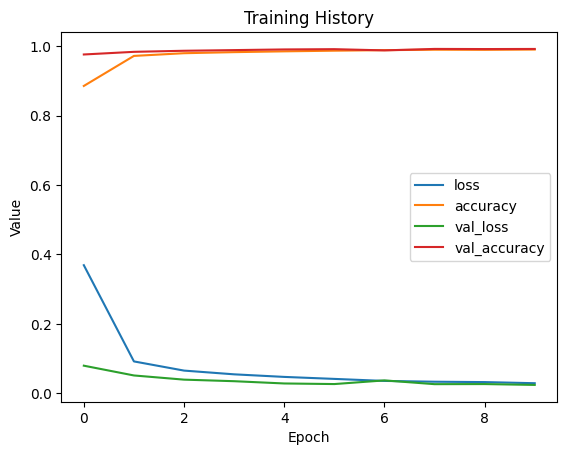

In [196]:
# Final evaluation of the model
scores_3 = model3.evaluate(X_test2, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores_3[1]*100))

final_loss_3, final_acc_3 = model3.evaluate(X_test2, y_test, verbose=0)
print("Final Loss: {0:.4f}, Final Accuracy: {1:.4f} %".format(final_loss_3, final_acc_3*100))

# Plot the training history
pd.DataFrame(history3.history).plot()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')

We can observe Larger is achieving some good outputs , as it generated respectable error rate 0.79% and highest accuracy 99.21% compared to Simple CNN and Baseline model. 

# Results: summarizing and visualizing the results discovered from the analysis


In [198]:
from prettytable import PrettyTable


x = PrettyTable()

#add columns to the table
x.field_names = ["Model", "Accuracy","Final Loss","Error rate"]

#add rows to the table with the performance metrics for each model
x.add_row(["Baseline Model with Multi-Layer Perceptrons","{:.2f}%".format(final_acc*100),"{:.4f}".format(final_loss),"{:.2f}%".format(100-scores_1[1]*100)])
x.add_row(["Simple Convolutional Neural Network","{:.2f}%".format(final_acc_2*100),"{:.4f}".format(final_loss_2),"{:.2f}%".format(100-scores_2[1]*100)])
x.add_row(["Larger Convolutional Neural Network","{:.2f}%".format(final_acc_3*100),"{:.4f}".format(final_loss_3),"{:.2f}%".format(100-scores_3[1]*100)])

#print the table
print(x)

+---------------------------------------------+----------+------------+------------+
|                    Model                    | Accuracy | Final Loss | Error rate |
+---------------------------------------------+----------+------------+------------+
| Baseline Model with Multi-Layer Perceptrons |  98.03%  |   0.0662   |   1.97%    |
|     Simple Convolutional Neural Network     |  98.93%  |   0.0339   |   1.07%    |
|     Larger Convolutional Neural Network     |  99.18%  |   0.0242   |   0.82%    |
+---------------------------------------------+----------+------------+------------+



<b>Error rate:</b> This slightly Larger Convolutional Neural Network model achieves a respectable classification error rate of 0.83%, where as Simple CNN gives error state of 1.15% followed by Baseline model with Multi-Layer Perceptrons gives 1.71%.

<b>Accuracy:</b> All the three models have given pretty good accuracy , but compared to Baseline or any other model , CNNs are extremely efficient for images. Hence, Larger CNN gives us the highest accuracy of 99.21% followed by Simple CNN model giving 98.85% and Baseline Model with Multi-Layer Perceptrons with 98.29%.

<b>Overfitting:</b> Also from the above plotted curves for each model we can analyze that, since the validation loss is decreasing while the training loss also continues to decrease, it is a good indication that the model is generalizing well and is not overfitting to the training data.

<b>Convergence rate:</b> Looking at Larger CNN model it has good convergence rate as it quickly converge the training and validation accuracy and loss the model. Basically the model that converges faster will typically achieve better performance in fewer epochs.

<b>Performace gap:</b> Look at the difference between the training and validation curves for all the three models we can observe the validation accuracy or loss is not higher than the training accuracy or loss, so it indicates that the model is generalizing well to new data.

C:\Users\ashis\AppData\Local\Temp\ipykernel_15956\3117371482.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


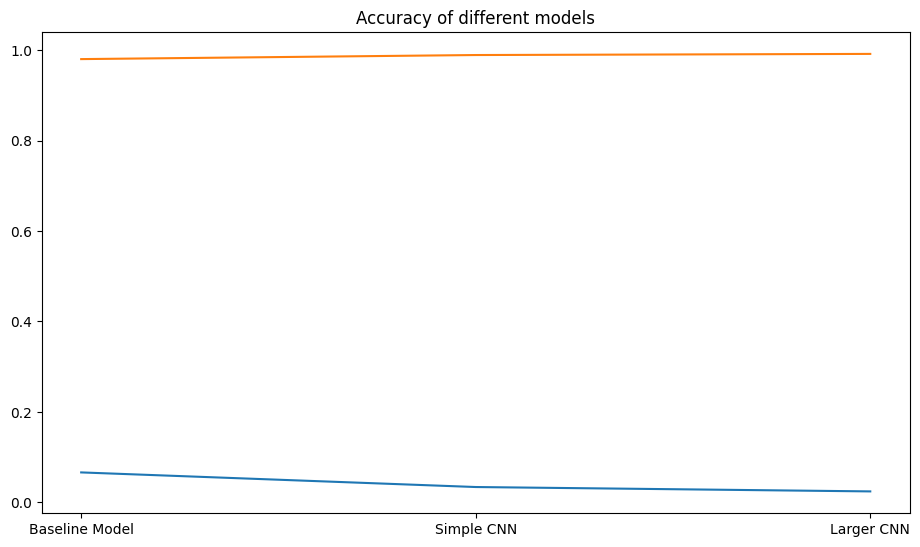

In [199]:
model_1_name = "Baseline Model"
model_2_name = "Simple CNN"
model_3_name = "Larger CNN"


# Create a list of model names and performance values
model = [model_1_name, model_2_name, model_3_name]
acc = [scores_1,scores_2,scores_3]

plt.subplots(figsize=(28,15))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

plt.subplot(2,2,1)
plt.plot(model,acc)
plt.title("Accuracy of different models")

# Show the figure
plt.show()

<h2>Make Predictions</h2>

We can use our saved model from Larger CNN to make a prediction on new images.

The model assumes that new images are grayscale, that they have been aligned so that one image contains one centered handwritten digit, and that the size of the image is square with the size 28×28 pixels.

We saved it in your current working directory with the filename ‘sample_image.png' which has '7' number image.

In [ ]:
# make a prediction for a new image.
from numpy import argmax
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img
 
# load an image and predict the class
def run_example():
 # load the image
 img = load_image('sample_image.png')
 # load model
 model3 = load_model('final_model.h5')
 # predict the class
 predict_value = model3.predict(img)
 digit = argmax(predict_value)
 print(digit)
 
# entry point, run the example
run_example()

Hence we can see that our model has correctly predicted the image number 7.


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.